<a href="https://colab.research.google.com/github/nusco/colab-tutorial/blob/main/ColabTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab in 10 Minutes

Welcome to “Colab in 10 Minutes”! This is a quick primer to Google Colab. You'll need a Google account to run it.

If you see anything that's broken, please create a GitHub issue. (link)

## Let's Get Started!

You're looking at a Colab notebook. This text is inside a *cell*. Cells are formatted with [Markdown](https://www.markdownguide.org/basic-syntax/). They can contain images, links, and so on.

![Welcome!](https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Emoji_u1f64b.svg/240px-Emoji_u1f64b.svg.png)

Go ahead: double-click on this cell to see its source text. Feel free to edit it if you wish. Don't worry, you won't be able to save changes back to the original notebook. (But you can make your own copy if you wish!)

Are you editing this cell? Good! As you do that, you can see the formatted text output here on the right. It's updated when you save the notebook. To save, use the `File` menu or a keyboard shortcut: `Cmd+S`, or `Ctrl+S` on a Mac.

Once you're done, press `Cmd/Ctrl+Enter` to run the cell. In the case of a text cell like this one, “running” it means that the text gets formatted.

## Code Cells

Here is the main feature of Colab: besides text, cells can also contain Python code. Try running the cell below. You can use `Shift+Return`, or click on the little arrow that appears when you hover over the cell. Google will ask you to login, and then to confirm that you want to run this code:

In [ ]:
for i in range(3):
    print("Hello!")

Hello!
Hello!
Hello!



Did it take a few seconds for the cell to run? That's because this code didn't run on your local machine. You see, the first time you run a code cell, Colab connects to a "runtime"--a machine hosted by Google.  You've just been running code in the cloud.

The runtime isn't shared with other people running this notebook. It's all yours. It won't stay yours for a long time, though. If you walk away from this page, or you use it for too long, Google will take it back and reboot it.. Don't be surprised if, from time to time, you see a captcha asking you whether you're still working on this notebook.

## More Good Stuff: Tables and Charts

Colab is pretty good for working with data. For example, try running the cell below to download a data set that contains information about commercial flights between 1949 and 1960:

In [ ]:
from google.colab import data_table
import seaborn as sns

data_table.enable_dataframe_formatter()

flights = sns.load_dataset('flights')
flights_by_year = flights.groupby(['year'])['passengers'].sum().reset_index()
flights_by_year

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


Let's consider for a minute what happened. One nice feature of Colab is that it comes pre-loaded with a bunch of useful Python libraries. In particular, it already contains the most popular libraries for working with data. For example, the `seaborn` library contains the data that you're looking at.

Also, we imported the `google.colab` library, that contains utilities that are specific to Colab notebook. In this case, we used `google.colab` to put data in an interactive table that you can sort, paginate, or filter. Go ahead and play with it, if you wish.

Now that we have the data, let's put it on a chart. Run the code cell below:

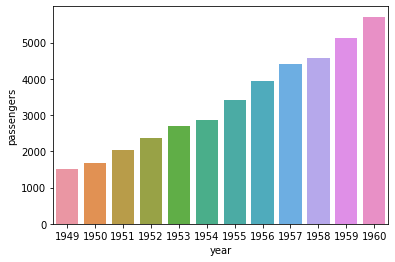

In [ ]:
import matplotlib.pyplot as plt

sns.barplot(x="year", y="passengers", data=flights_by_year)
plt.show()

We displayed the chart with `matplotlib`--another popular Python library that comes preloaded in Colab. Seaborn added the fruity colors.

Let's stop

 ## A “Computational Notebook”
 
So that's Google Colab in a single sentence: a system that allows you to write documents that contain both text and runnable code. Systems like are sometimes called [computational notebooks](https://martinfowler.com/bliki/ComputationalNotebook.html). Colab is based on the most popular computational notebook: [Jupyter Notebook](https://jupyter.org/), that is very popular among people who do data science and machine learning.

Colab lacks some of Jupyter's features. For example, Jupyter supports many programming languages, while Colab only has Python. On the other hand, Colab adds a lot of features of its own that Jupyter doesn't have. In particular, Colab can spin a runtime in the cloud.

Let's use this last feature to do some machine learning of our own.


The command above blah blah

it failed, because blah

do `Runtime -> Change Runtime Type`. Under "Hardware accelerator", select "GPU", then "Save". Now execute the code cell above again, and you'll see your brand new GPU.

autocomplete, documentation, etc

at least one big data table

at least one chart

system aliases, magics, normal commands

add, remove, move cells

image from [here](https://www.flickr.com/photos/36902337@N07/8622731362)

In [ ]:
!wget https://live.staticflickr.com/8392/8622731362_984012906e_c_d.jpg --output-document people.jpg

--2021-11-21 18:32:15--  https://live.staticflickr.com/8392/8622731362_984012906e_c_d.jpg
Resolving live.staticflickr.com (live.staticflickr.com)... 52.222.142.95, 2600:9000:2104:1a00:0:5a51:64c9:c681, 2600:9000:2104:f200:0:5a51:64c9:c681, ...
Connecting to live.staticflickr.com (live.staticflickr.com)|52.222.142.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘people.jpg’

people.jpg              [ <=>                ] 122.12K  --.-KB/s    in 0.01s   

2021-11-21 18:32:15 (10.5 MB/s) - ‘people.jpg’ saved [125053]



In [ ]:
!ls

people.jpg  sample_data


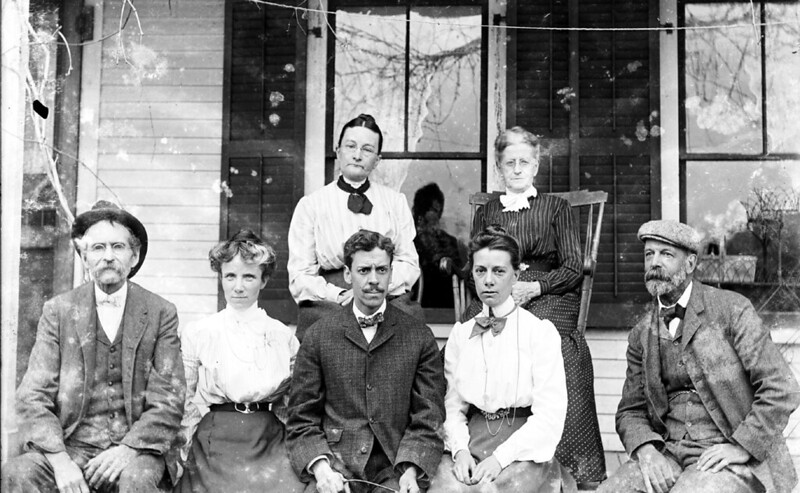

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('people.jpg')
cv2_imshow(image)

In [ ]:
%pip install face_recognition

In [ ]:
%%time

import face_recognition

locations = face_recognition.face_locations(image)

CPU times: user 1.44 s, sys: 172 ms, total: 1.61 s
Wall time: 1.61 s


In [ ]:
locations

[(257, 511, 300, 467),
 (266, 261, 310, 218),
 (234, 135, 285, 83),
 (132, 376, 175, 333),
 (154, 533, 190, 497),
 (257, 395, 300, 352)]

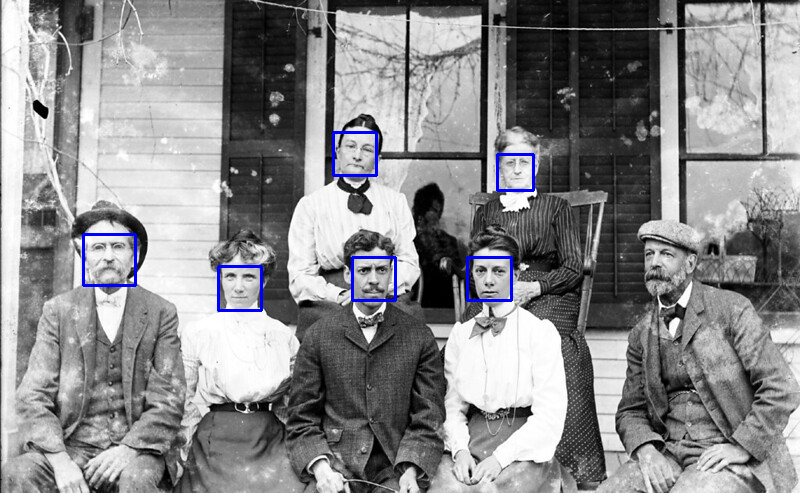

In [ ]:
image_annotated = image.copy()
for location in locations:
    # Show the locations' bounding box over this image
    y2, x1, y1, x2 = location
    image_annotated = cv2.rectangle(image_annotated, (x1, y1), (x2, y2), (255, 0, 0), 2)
cv2.cvtColor(image_annotated, cv2.COLOR_BGR2RGB)
cv2_imshow(image_annotated)

In [ ]:
!nvidia-smi

Sun Nov 21 18:32:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    32W / 250W |    299MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import data_table

data_table.enable_dataframe_formatter()

import seaborn as sns

flights = sns.load_dataset('flights')
flights_by_year = flights.groupby(['year'])['passengers'].sum().reset_index()
flights_by_year

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


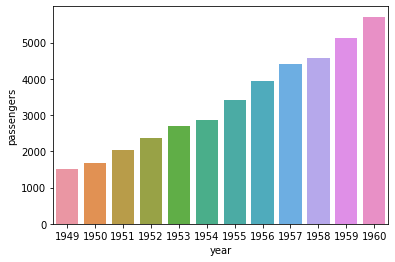

In [ ]:
import matplotlib.pyplot as plt

sns.barplot(x="year", y="passengers", data=flights_by_year)
plt.show()

In [ ]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

import altair as alt

points = alt.Chart(cars).mark_point().encode(
  x='Year:T',
  y='Miles_per_Gallon',
  color='Origin'
).properties(
  width=800
)

lines = alt.Chart(cars).mark_line().encode(
  x='Year:T',
  y='mean(Miles_per_Gallon)',
  color='Origin'
).properties(
  width=800
).interactive(bind_y=False)
              
points + lines

alt.LayerChart(...)

In [ ]:
import altair as alt
import ipywidgets as widgets
from vega_datasets import data

source = data.stocks()

stock_picker = widgets.SelectMultiple(
    options=source.symbol.unique(),
    value=list(source.symbol.unique()),
    description='Symbols')

# The value of symbols will come from the stock_picker.
@widgets.interact(symbols=stock_picker)
def render(symbols):
  selected = source[source.symbol.isin(list(symbols))]

  return alt.Chart(selected).mark_line().encode(
      x='date',
      y='price',
      color='symbol',
      strokeDash='symbol',
  )